In [14]:
import numpy as np
import json
from phc import module_reload, json_file_readable
import matplotlib.pyplot as plt

INDEX_DIR = '/nfs/dust/ilc/user/bliewert/zhh/CreateRawIndex/v1'
CHUNK_DIR = '/nfs/dust/ilc/user/bliewert/zhh/CreatePreselectionChunks/v1'
DATA_ROOT = '/nfs/dust/ilc/user/bliewert/zhh/PreselectionFinal/v1'
DATA_ROOT_RUNTIME = '/nfs/dust/ilc/user/bliewert/zhh/PreselectionRuntime/v1'

processes = np.load(f'{INDEX_DIR}/processes.npy')
samples = np.load(f'{INDEX_DIR}/samples.npy')
existing_chunks = np.load(f'{CHUNK_DIR}/chunks.npy')

print(len(existing_chunks))

4404


In [4]:
(existing_chunks['process'] == 'qqqqh').sum()

250

In [5]:
existing_chunks['branch'][existing_chunks['process'] == 'qqqqh']

array([2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531,
       2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542,
       2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553,
       2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564,
       2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575,
       2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586,
       2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597,
       2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608,
       2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619,
       2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630,
       2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641,
       2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652,
       2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663,
       2664, 2665, 2666, 2667, 2668, 2669, 2670, 26

In [29]:
module_reload('zhh')
from zhh import get_adjusted_time_per_event, get_runtime_analysis, \
    get_process_normalization, get_sample_chunk_splits, \
    get_chunks_factual

if True:
    runtime_analysis = get_runtime_analysis(DATA_ROOT_RUNTIME)
    pn = get_process_normalization(processes, samples, RATIO_BY_EXPECT=1.)
    atpe = get_adjusted_time_per_event(runtime_analysis)
else:
    runtime_analysis = np.load(f'{CHUNK_DIR}/runtime_analysis.npy')
    pn = np.load(f'{CHUNK_DIR}/process_normalization.npy')
    atpe = np.load(f'{CHUNK_DIR}/v1/atpe.npy')

with open(f'/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH/workflows/analysis/custom_statistics.json', 'r') as file:
    custom_statistics = json.load(file)
    
new_chunks = get_sample_chunk_splits(samples, atpe, pn, custom_statistics=custom_statistics,
                                 MAXIMUM_TIME_PER_JOB=7200)

In [30]:
len(existing_chunks), len(new_chunks)

(4404, 4404)

In [31]:
from zhh import get_chunks_factual
chunks_f = get_chunks_factual(DATA_ROOT, existing_chunks, attach_time=True)

Skipping chunk 720 (unrecoverable), will be removed
Skipping chunk 806 (unrecoverable), will be removed
Skipping chunk 852 (unrecoverable), will be removed
Skipping chunk 1644 (unrecoverable), will be removed
Skipping chunk 1645 (unrecoverable), will be removed
Skipping chunk 1667 (unrecoverable), will be removed
Skipping chunk 1742 (unrecoverable), will be removed
Skipping chunk 2548 (unrecoverable), will be removed


# (actual) Runtime analysis

<BarContainer object of 10 artists>

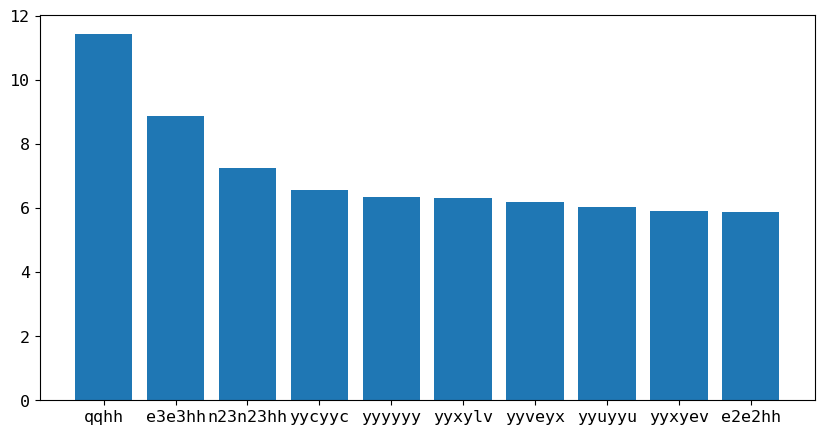

In [72]:
unq_processes = np.unique(chunks_f['process'])
result = np.zeros(len(unq_processes), dtype=[('process', 'U10'), ('tPE', 'f4')])

for i, process in enumerate(unq_processes):
    chunks = chunks_f[chunks_f['process'] == process]
    
    result['process'][i] = process
    result['tPE'][i] = chunks['runtime'].sum() / chunks['chunk_size_factual'].sum()

sorting = np.argsort(-result['tPE'])
n_show = 10

plt.subplots(figsize=(10, 5))
plt.bar(unq_processes[sorting][:n_show], result['tPE'][sorting][:n_show])

In [73]:
result['tPE'][result['process'] == 'qqqqh']

array([5.2942], dtype=float32)

# Comparison to assumptions

<BarContainer object of 10 artists>

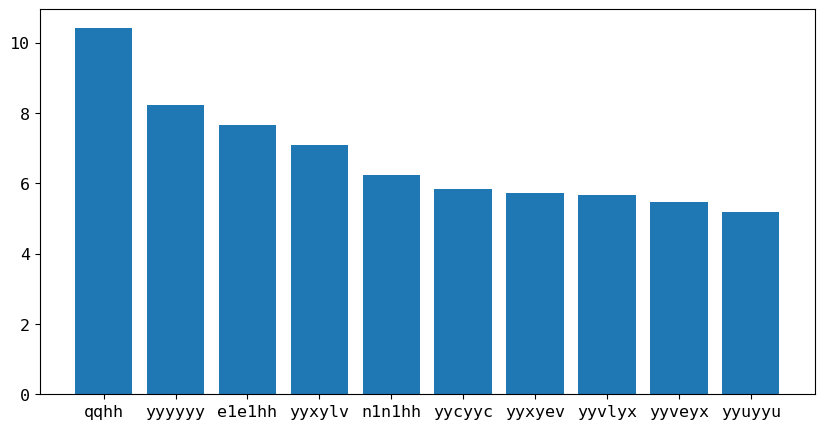

In [71]:
sorting = np.argsort(-atpe['tPE'])

plt.subplots(figsize=(10, 5))
plt.bar(atpe['process'][sorting][:n_show], atpe['tPE'][sorting][:n_show])

In [74]:
atpe['tPE'][result['process'] == 'qqqqh']

array([2.97], dtype=float32)

['llllll' 'vvveev' 'vvvlev' 'eeeeee' 'vvvelv' 'llvlev' 'eeeeee' 'llvelv'
 'vvveev' 'xxvelv' 'vvxyev' 'llvllv' 'eeveev' 'llvlyx' 'eevelv' 'vvvllv'
 'vvveev' 'llllll' 'eeeell' 'llxyyx']


(array([4.259e+03, 1.170e+02, 1.000e+01, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.09151225,  1.90054282,  3.7095734 ,  5.51860398,  7.32763455,
         9.13666513, 10.9456957 , 12.75472628, 14.56375686, 16.37278743,
        18.18181801]),
 <BarContainer object of 10 artists>)

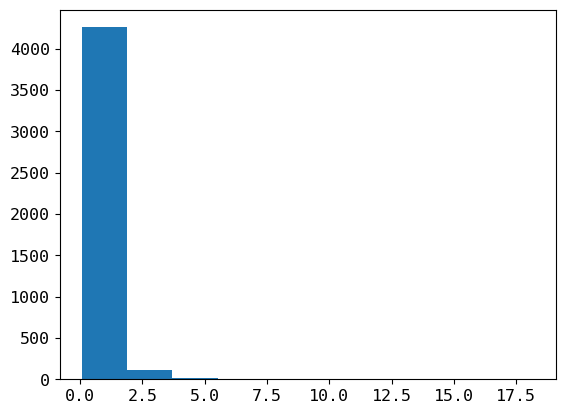

In [58]:
fractions = np.zeros(len(chunks_f), dtype=float)
for i, chunk in enumerate(chunks_f):
    fractions[i] = (chunk['runtime'] / chunk['chunk_size_factual'])/atpe['tPE'][atpe['process'] == chunk['process']]
    
sorting = np.argsort(-fractions)
print(chunks_f['process'][sorting][:20])

plt.hist(fractions)

(array([  70., 1604.,   66.,   37.,    9., 1749.,   75.,  122.,   58.,
         606.]),
 array([0.98842258, 0.98958032, 0.99073806, 0.9918958 , 0.99305355,
        0.99421129, 0.99536903, 0.99652677, 0.99768452, 0.99884226,
        1.        ]),
 <BarContainer object of 10 artists>)

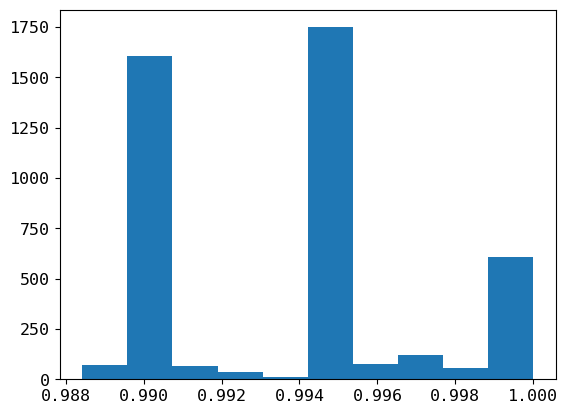

In [25]:
plt.hist(chunks_f['chunk_size_factual']/chunks_f['chunk_size'])

In [17]:
print(existing_chunks[2548])

atpe['tPE'][atpe['process'] == 'qqqqh'][0] * existing_chunks['chunk_size'][2548]

(2548, 'qqqqh', 'qqqqh_LR', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015747/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403019.Pqqqqh.eL.pR.n001.d_dstm_15747_13.slcio', 27, 2424, 2424)


7199.280069351196

In [4]:
hh = list(filter(lambda x: 'hh' in x, np.unique(chunks['process'])))

for process in hh:
    print(pn[pn['process'] == process])

[('e1e1hh', 'e1e1hh_LL', 0.00027244, 1.8007195e-07, 953154,  0.1716363 , 1)
 ('e1e1hh', 'e1e1hh_LR', 0.01141446, 1.4011289e-05, 953154, 13.354916  , 3)
 ('e1e1hh', 'e1e1hh_RL', 0.00724756, 5.3226370e-07, 953154,  0.5073292 , 1)
 ('e1e1hh', 'e1e1hh_RR', 0.00027244, 3.7157957e-08, 953154,  0.03541726, 1)]
[('e2e2hh', 'e2e2hh_LR', 0.01116575, 2.7462776e-05, 475696, 13.063933 , 2)
 ('e2e2hh', 'e2e2hh_RL', 0.00714938, 1.0520512e-06, 475696,  0.5004566, 1)]
[('e3e3hh', 'e3e3hh_LR', 0.01114067, 2.8200320e-05, 462214, 13.034582  , 2)
 ('e3e3hh', 'e3e3hh_RL', 0.00713333, 1.0803079e-06, 462214,  0.49933344, 1)]
[('n1n1hh', 'n1n1hh_LR', 0.03004878, 7.1302115e-05, 493072, 35.157074 , 6)
 ('n1n1hh', 'n1n1hh_RL', 0.01413045, 2.0060588e-06, 493072,  0.9891315, 1)]
[('n23n23hh', 'n23n23hh_LR', 0.0441279 , 1.07372296e-04, 480847, 51.629646 , 8)
 ('n23n23hh', 'n23n23hh_RL', 0.02827151, 4.11566543e-06, 480847,  1.9790053, 1)]
[('qqhh', 'qqhh_LR', 0.22561218, 1.3198312e-04, 2000000, 263.96625 , 40)
 ('qqh

In [16]:
s = 0
for process in ['e1e1hh', 'e2e2hh', 'e3e3hh']:
    s += np.sum(pn['n_events_expected'][pn['process'] == process])

print(s)

41.16760444641113


In [5]:
hh = list(filter(lambda x: 'hh' in x, np.unique(chunks['process'])))

for process in hh:
    print(chunks[chunks['process'] == process])

[(16758, 'e1e1hh', 'e1e1hh_LL', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015744/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403021.Pe1e1hh.eL.pL.n001.d_dstm_15744_14.slcio', 0, 0, 1)
 (16759, 'e1e1hh', 'e1e1hh_LR', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015744/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403022.Pe1e1hh.eL.pR.n002.d_dstm_15744_26.slcio', 0, 0, 3)
 (16760, 'e1e1hh', 'e1e1hh_RL', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015744/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403023.Pe1e1hh.eR.pL.n000.d_dstm_15744_6.slcio', 0, 0, 1)
 (16761, 'e1e1hh', 'e1e1hh_RR', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015743/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403024.Pe1e1hh.eR.pR.n000.d_dstm_15743_2.slcio', 0, 0, 1)]
[(16766, 'e2e2hh', 'e2e2hh_LR

In [6]:
failing = 0
for sample in samples:
    loc = sample['location']
    n_events = sample['n_events']
    
    for entry in chunks[chunks['location'] == loc]:
        if entry['chunk_start'] + entry['chunk_size'] > n_events:
            failing += 1
            print(f"{entry['chunk_start'] + entry['chunk_size']} > {n_events}")
            
            #print(chunks[chunks['location'] == loc])
            #print(sample)
            #break
    else:
        continue
    break
            
print(f'n failing: {failing}')

n failing: 0


In [7]:
len(chunks)

21901

Check worflow results

In [2]:
chunks = np.load('/nfs/dust/ilc/user/bliewert/zhh/CreatePreselectionChunks/v1/chunks.npy')

In [4]:
chunks[chunks['process'] == 'e1e1hh']

array([(13488, 'e1e1hh', 'e1e1hh_LL', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015744/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403021.Pe1e1hh.eL.pL.n001.d_dstm_15744_14.slcio', 0, 0, 1),
       (13489, 'e1e1hh', 'e1e1hh_LR', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015744/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403022.Pe1e1hh.eL.pR.n002.d_dstm_15744_26.slcio', 0, 0, 1),
       (13490, 'e1e1hh', 'e1e1hh_RL', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015744/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403023.Pe1e1hh.eR.pL.n000.d_dstm_15744_6.slcio', 0, 0, 1),
       (13491, 'e1e1hh', 'e1e1hh_RR', '/pnfs/desy.de/ilc/prod/ilc/mc-2020/ild/dst-merged/500-TDR_ws/hh/ILD_l5_o1_v02/v02-02-03/00015743/000/rv02-02-03.sv02-02-03.mILD_l5_o1_v02.E500-TDR_ws.I403024.Pe1e1hh.eR.pR.n000.d_dstm_15743_2.slcio', 0, 0, 1)],
 

In [6]:
len(chunks)

15497

In [ ]:
len(chunks)

15497